
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('KeyWords2(wjx).csv',header=None)
df=df.drop([0],axis=1)   #删除0、1列（都是序号）
df=df.drop([1],axis=0)
df.columns=range(df.shape[1])     
display(df)

In [15]:
# train和test的分界位置：前2/3用作训练，后1/3用作测试
M=np.int32(df.shape[0]*2/3)
IVarCnt=df.shape[1]-2          #自变量个数: 注意最后两列是歌曲名称、歌曲类型
print(M,'/',df.shape[0],'\n')

159234 / 238852 



In [38]:
# 自变量
ColSet=range(2,IVarCnt+2) #自变量在数据集中的位置（列）
x=df.iloc[:,ColSet].values
x_train=df.iloc[2:M,ColSet].values   
x_test= df.iloc[M:, ColSet].values   

print('\nx_train',x_train.shape)
print(x_train)
print('\nx_test',x_test.shape)
print(x_test)


x_train (159232, 23)
[[0 0 0 ... 5 2 2]
 [0 0 0 ... 3 1 1]
 [1 0 0 ... 2 1 0]
 ...
 [0 0 0 ... 1 2 1]
 [0 0 0 ... 2 1 3]
 [2 0 0 ... 2 1 0]]

x_test (79618, 23)
[[0 0 0 ... 1 0 1]
 [0 0 0 ... 3 2 0]
 [0 1 1 ... 3 1 0]
 ...
 [0 2 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 2 0 0]]


In [17]:
# 为因变量准备原始数据
Y=df.iloc[:,1].values     #第1列，即：歌曲类型
Y_train=Y[2:M]
Y_test= Y[M:]

print('\nY_train',Y_train.shape)
print(Y_train)
print('\nY_test',Y_test.shape)
print(Y_test)

print('\nY',Y.shape)
print(Y)


Y_train (159232,)
['Melodic Death/Power/Black Metal' 'Melodic Death/Power/Black Metal'
 'Melodic Death/Power/Black Metal' ... 'Death/Thrash Metal'
 'Death/Thrash Metal' 'Death/Thrash Metal']

Y_test (79618,)
['Death/Thrash Metal' 'Death/Thrash Metal' 'Death/Thrash Metal' ...
 'Melodic Black/Folk Metal (early); Melodic Death/Folk Metal (later)'
 'Melodic Black/Folk Metal (early); Melodic Death/Folk Metal (later)'
 'Melodic Black/Folk Metal (early); Melodic Death/Folk Metal (later)']

Y (238852,)
['genre' 'Black Metal' 'Melodic Death/Power/Black Metal' ...
 'Melodic Black/Folk Metal (early); Melodic Death/Folk Metal (later)'
 'Melodic Black/Folk Metal (early); Melodic Death/Folk Metal (later)'
 'Melodic Black/Folk Metal (early); Melodic Death/Folk Metal (later)']


In [49]:
import pandas as pd
BlackType=pd.read_csv('Black Metal Types.csv').reset_index()
BlackType=BlackType.drop(['index'],axis=1)
BlackType.columns=['type','numbers']
display(BlackType)

T00=BlackType[BlackType['numbers']<=500]['type'].values
T00=T00.tolist()

T01=['Pagan Black Metal','Industrial Black Metal','Epic Black Metal']
T02=['Blackened Thrash Metal','Blackened Death Metal','Blackened Metal']
T03=['Progressive Black Metal','Experimental Black Metal','Avant-garde Black Metal']
T04=['Post-Black Metal']
T05=['Depressive Black Metal']
T06=['Raw Black Metal']
T07=['Atmospheric Black Metal']
T08=['Symphonic Black Metal']
T09=['Melodic Black Metal']
T10=['Black Metal']
T11=['Black']

SongType=[T00,T01,T02,T03,T04,T05,T06,T07,T08,T09,T10,T11]

,type,numbers
0,Black,177416
1,Melodic Black,9132
2,Symphonic Black,6911
3,Blackened,6493
4,Atmospheric Black,4715
...,...,...
141,Industrial Blackened Death,1
142,Blackened Technical Death,1
143,Blackened Heavy Metal with Folk influences,1
144,Technical Progressive Black,1


In [29]:
T00

['Ambient Black',
 "Black 'n' Roll",
 'Folk Black',
 'Blackened Doom',
 'Blackened Heavy',
 'Black Metal with Folk',
 'Black Metal with Folk influences',
 'Blackened Sludge',
 'Experimental Post-Black',
 'Technical Black',
 'Raw Symphonic Black',
 'Blackened Melodic Death',
 'Blackened Speed',
 'Atmospheric Post-Black',
 'Viking Black',
 'Blackened Gothic',
 'Black Metal with Industrial influences',
 'Neoclassical Black',
 'Symphonic Blackened Death',
 'Blackened Grindcore',
 'Melodic Blackened Death',
 'Blackened Industrial',
 'Psychedelic Black',
 'Melodic Black Metal with Power Metal influences',
 'Gothic Black',
 'Blackened Progressive',
 'Epic Atmospheric Black',
 'Blackened Folk',
 'Heavy Metal with Black Metal influences',
 'Black Metal with Punk',
 'Progressive Post-Black',
 'Blackened Post-Metal',
 'Blackened Deathcore',
 'Blackened Death Metal with Thrash elements',
 'Symphonic Progressive Black',
 'Epic Black Metal with Folk influences',
 'Black Metal with Doom influences',


In [46]:
IsBandType('Black Metal',10)

True

In [50]:
def IsBandType(song,typeidx):
    s=song
    Arr=[]
    while True:
        p=s.find('/')
        if(p>0):
            Arr.append(s[0:p])
            s=s[p+1:]
        else:
            Arr.append(s)
            break
    b=False
    for s in Arr:
        for t in SongType[typeidx]:
            if s==t:
                b=True
                break
        if b:
            break       
    return b


# 回归模型精度
def accuracy(X, y, w, b):
    result = predict(X, w, b)
    return np.sum(np.where(result==y,1,0))/len(y)    
 
# 回归模型预测值   

def predict(X, w, b):
    v=np.dot(X,w)+b
    result =np.where(v>=0.5, 1, 0)                      
    return result


------------------- 0 Ambient Black --------------------

y= [0. 0. 0. ... 0. 0. 0.]
count= 866.0
y_train: [0. 0. 0. ... 0. 0. 0.]
length: 159232


y_test: [0. 0. 0. ... 0. 0. 0.]
length: 79618
Accuracy=99.49%
w= [-3.21196574e+08 -9.05851030e+05  2.91122124e-05  7.70557672e-04
 -3.15493855e+08  9.05851030e+05 -4.15876508e-04 -1.52736902e-04
  2.53562815e-04 -3.61241400e-05  6.36690429e+08  7.14220107e-04
 -2.22805887e-04 -1.69062987e-04 -1.92640349e-04 -1.33598223e-04
 -4.87081707e-06 -1.81470066e-04 -1.17713585e-04 -2.11823732e-04
  2.46077776e-04 -1.59347430e-04  1.20209530e-04]
b= 0.003684685164335887

------------------- 1 Pagan Black Metal --------------------

y= [0. 0. 0. ... 0. 0. 0.]
count= 951.0
y_train: [0. 0. 0. ... 0. 0. 0.]
length: 159232


y_test: [0. 0. 0. ... 0. 0. 0.]
length: 79618
Accuracy=99.53%
w= [ 9.72745692e+07  2.74337510e+05  1.57866860e-04  1.59846619e-04
  9.55474971e+07 -2.74337511e+05 -3.25996429e-04 -3.97513621e-04
 -6.61456026e-04  1.35237817e-04 -1.928

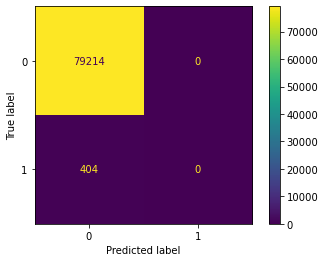

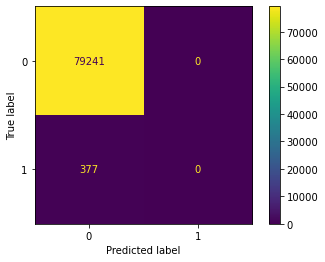

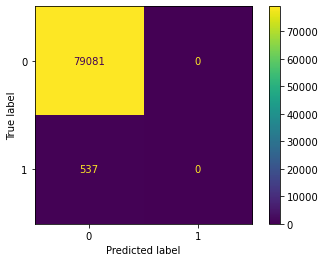

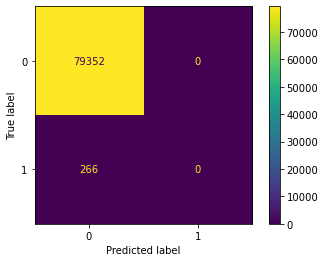

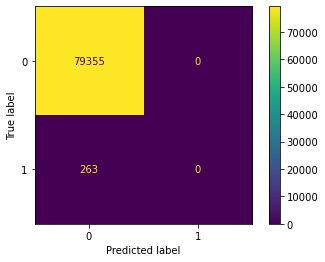

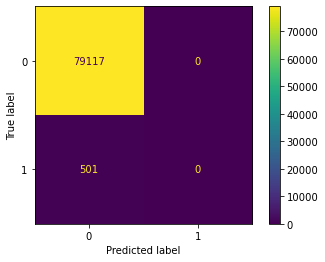

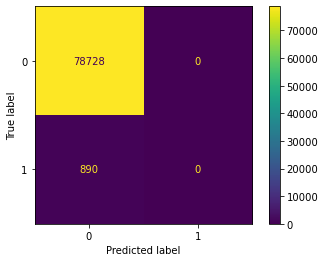

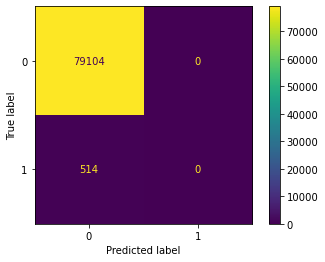

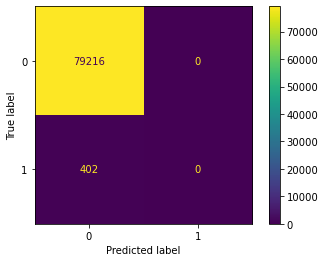

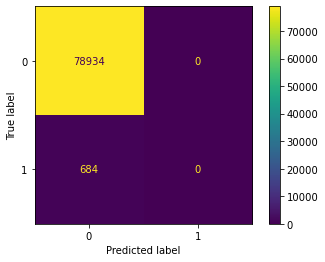

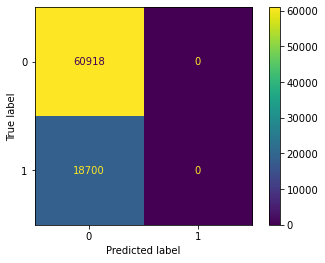

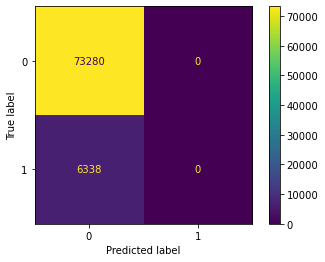

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

for m in range(len(SongType)):
    print('\n-------------------',m,SongType[m][0],'--------------------\n')
    
    # 将Y中的歌曲类型转化为数值0-1: 根据是否为第m个歌曲类型，
    # 然后把转化后的y作为因变量
    y=np.zeros(df.shape[0]) # 用于转化为数值0-1，代表是否是第m类歌曲 

    for i in range(len(Y)):
        if IsBandType(Y[i],m):
            y[i]=1     # 转化为数值0-1
        else:
            y[i]=0
    print('y=',y)
    print('count=',np.sum(y)) 

    # 确定训练用的因变量、测试用的因变量
    y_train=y[2:M]                          
    y_test= y[M:]
    
    print('y_train:',y_train)
    print('length:',len(y_train))
    print('\n')
    print('y_test:',y_test)
    print('length:',len(y_test))
    
    # 初试化w和b，都取0.1
    #weights=np.ones(IVarCnt)/10 
    #bias=np.ones(1)/10
    
    ## model选择：
    
     ##建立模型：
    model = LinearRegression()
    model = model.fit(x_train, y_train)  
    
    weights=model.coef_    
    bias=model.intercept_
 
    
    pre=predict(x_test, weights, bias)
    #print('my prediction:',predict(x_train, weights, bias))
    #print('my accuracy:',accuracy(x_train, y_train, weights, bias))
    
    
    
     # 打印模型准确度
    print('Accuracy=%.2f%%' % (100*accuracy(x_test, y_test, weights, bias)))
        
        
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    # 打印模型的系数
    print('w=',weights)
    print('b=',bias)
    
                                                    # 预测值（歌曲是否第m类）
    if m==0:      
        pre=pre.reshape(-1,1)
        PreArr=pre                                  # 保存预测值（歌曲是否第m类）
        y_test=y_test.reshape(-1,1)
        ActArr=y_test                               # 保存实际值（歌曲是否第m类） 
    else:    
        PreArr=np.insert(PreArr,m,pre,axis=1)       # 保存预测值（歌曲是否第m类）  
        ActArr=np.insert(ActArr,m,y_test,axis=1)    # 保存实际值（歌曲是否第m类）

ErrArr=np.where(PreArr!=ActArr, 1, 0).sum(axis=1)   # 对每首歌曲统计预测错误（各列加起来）
ErrArr=np.where(ErrArr>0, 1, 0)                     # 每首歌曲是否有预测错误：1=是 0-否
CorectRatio=1-ErrArr.sum()/len(y_test)              # 正确率

print('\n=====================================================================\n')
print('Total Corect Ratio=%.2f%%' % (100*CorectRatio))
print('\n=====================================================================\n\n')